In [129]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('~/Documents/GitHub/RGTM/Cleaned/FINAL_ALL_FOR_MODELS_NUM.csv', index_col = 0)
data.drop(2745, axis = 0, inplace = True)
data.head()

,ZipCode,BuildingCategoryNum,BuildingClassAtTimeOfSale,TaxClassAtTimeOfSale,Baths,Beds,YearBuilt,NumComplaints3moPointOneMile,NumFelonies3moPointOneMile,min_dist_park,min_dist_subway,halfMileAvgPrice6mo,SalePrice
0,10014,10,D4,2,1,1,1925,23,7,0.689780,0.297014,2338579.64,760000
1,10014,17,R9,2,1,1,1925,0,8,0.465988,0.197643,NaN,850000
2,10014,17,R9,2,1,0,1930,52,60,0.285878,0.065509,2251045.91,560000
3,10027,1,A5,1,6,5,1901,15,6,0.212778,0.201120,994845.41,2625000
4,10027,2,B1,1,5,4,1899,13,24,0.312703,0.165961,930428.54,3400000


In [3]:
# Fill in missing values with median
data['halfMileAvgPrice6mo'] = data['halfMileAvgPrice6mo'].fillna(data['halfMileAvgPrice6mo'].median())

In [4]:
# for i in range(data.shape[1]):
#     print(data.columns[i], data.iloc[:,i].dtype)

In [5]:
features = ['Baths', 'Beds','YearBuilt', 'TaxClassAtTimeOfSale',
            'NumComplaints3moPointOneMile', 'NumFelonies3moPointOneMile',
            'min_dist_park', 'min_dist_subway', 'halfMileAvgPrice6mo', 'SalePrice']

X = data[features]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train.drop('SalePrice', 1), y_train)
predictions_lr = lr.predict(X_test.drop('SalePrice', 1))

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train.drop('SalePrice', 1), y_train)
predictions_linreg = linreg.predict(X_test.drop('SalePrice', 1))

KeyboardInterrupt: 

In [6]:
from sklearn.metrics import r2_score
r2_score(X_test['SalePrice'], predictions_linreg)

0.3677976142926572

In [41]:
# import statsmodels.api as sm
# model = sm.OLS(y_train, X_train.drop('SalePrice', 1)).fit()
# model.summary()

# Modeling

In [19]:
data_new = pd.read_csv('~/Documents/GitHub/RGTM/Cleaned/MODEL_medPrice_saleVol.csv', index_col = 0)

In [20]:
# data.drop(data_new['YearBuilt'].is
drop_index = data_new[data_new['YearBuilt'] == 0].index
data_new = data_new.drop(drop_index, axis = 0)

In [23]:
X = data_new
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train.drop('SalePrice', 1), y_train)
predictions_linreg = linreg.predict(X_test.drop('SalePrice', 1))
# print(linreg.intercept_)
# print(linreg.coef_)
# predictions_linreg

ValueError: could not convert string to float: 'COOPS'

In [57]:
r2_score(X_test['SalePrice'], predictions_linreg)

0.5447286856897977

### Linear Regression

In [58]:
X = data_new.drop('SalePrice', 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions_linreg = linreg.predict(X_test)
# print(linreg.intercept_)
# print(linreg.coef_)
r2_score(y_test, predictions_linreg)

0.5447286856897977

In [59]:
# calculate MAE, MSE, RMSE for Linear Regression
print('MAE: ', metrics.mean_absolute_error(y_test, predictions_linreg))
print('MSE: ', metrics.mean_squared_error(y_test, predictions_linreg))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_linreg)))

MAE:  769469.8033630067
MSE:  2451307647885.0356
RMSE:  1565665.2413223702


### Polynomial

In [64]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)

In [65]:
poly = LinearRegression()
poly.fit(X_, y)
predictions_poly = poly.predict(X_test_)

In [66]:
r2_score(y_test, predictions_poly)

0.745734197247942

In [121]:
data_new = pd.read_csv('~/Documents/GitHub/RGTM/Cleaned/data_final_model_run2.csv', index_col = 0)

In [122]:
# poly = PolynomialFeatures(degree=2)
# X_ = poly.fit_transform(X)
# X_test_ = poly.fit_transform(X_test)
# poly = LinearRegression()
# poly.fit(X_, y)
# predictions_poly = poly.predict(X_test_)
# r2_score(y_test, predictions_poly)

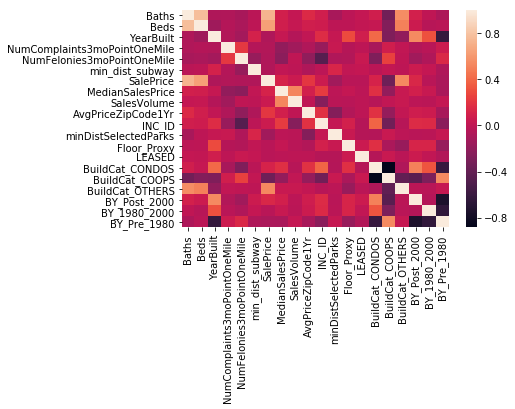

In [123]:
import seaborn as sns
corr = data_new.corr()
sns.heatmap(corr)

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = data_new.drop(['INC_ID', 'SalePrice', 'MedianSalesPrice'], 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(1,5):
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on test data-set
    X_test_poly = poly.fit_transform(X_test)
    predictions_poly = poly_model.predict(X_test_poly)   
    print('degree '+ str(i), r2_score(y_test, predictions_poly))

degree 1 0.6336114964826369
degree 2 0.6526152770338085
degree 3 0.6663925646665191
degree 4 -5.453695851125651


In [135]:
X = data_new.drop(['INC_ID', 'SalePrice', 'MedianSalesPrice'], 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions_linreg = linreg.predict(X_test)
r2_score(y_test, predictions_linreg)

0.6336114964887547

In [127]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
X = data_new.drop(['INC_ID', 'SalePrice', 'MedianSalesPrice'], 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ridge Regression with 
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)
print(r2_score(y_test, predictions_ridge))

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
predictions_lasso = lasso.predict(X_test)
print(r2_score(y_test, predictions_lasso))

0.6334750492726668
0.6336114964154794


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [136]:
alpha = np.logspace(-3, 3, num = 5)
for a in alpha:
#     lasso = Lasso(alpha=a)
#     lasso.fit(X_train,y_train)
#     predictions_lasso = lasso.predict(X_test)
#     print(r2_score(y_test, predictions_lasso))
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)
    print(r2_score(y_test, predictions_ridge))

0.633611360252262
0.6336071881259024
0.6334750492726668
0.6293825743108445
0.5877139851307489


In [132]:
np.logspace(-3, 3, num = 5)

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

In [89]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = data_new.drop(['INC_ID', 'SalePrice', 'LEASED'], 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

KeyboardInterrupt: 

### Logistic Regression

In [106]:
# Logistic Regression
X = data_new.drop(['INC_ID', 'SalePrice', 'LEASED'], 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
print(lr.score(X_test, y_test))

# # calculate MAE, MSE, RMSE for Logistic Regression
# print('MAE: ', metrics.mean_absolute_error(y_test, predictions_lr))
# print('MSE: ', metrics.mean_squared_error(y_test, predictions_lr))
# print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

0.00698856416772554


In [107]:
X = data_new.drop('SalePrice', axis = 1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
predictions_dt = regressor.predict(X_test)
regressor.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Random Forest

In [61]:
X = data_new.drop('SalePrice',1)
y = data_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
predictions_dt = regressor.predict(X_test)

regressor.score(X_test, y_test)

0.5343965146492407

In [22]:
predictions_dt

array([5387500. , 1388300. ,  816800. , ..., 1516973.3, 6108650. ,
       1242500. ])

### Standard Scaler

In [ ]:
features = ['Baths', 'Beds','YearBuilt', 'TaxClassAtTimeOfSale',
            'NumComplaints3moPointOneMile', 'NumFelonies3moPointOneMile',
            'min_dist_park', 'min_dist_subway', 'halfMileAvgPrice6mo', 'SalePrice']

scl = preprocessing.StandardScaler()
data_clean = data.copy()
data_clean[features] = scl.fit_transform(data[features])
data_clean['SalePrice'] = data['SalePrice'].values

from sklearn.model_selection import train_test_split
X = data_clean[features]
y = data_clean['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train.drop('SalePrice', 1), y_train)
predictions_lr = lr.predict(X_test.drop('SalePrice', 1))

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train.drop('SalePrice', 1), y_train)
predictions_linreg = linreg.predict(X_test.drop('SalePrice', 1))
# print(linreg.intercept_)
# print(linreg.coef_)
# predictions_linreg

# pair the feature names with the coefficients
list(zip(features, linreg.coef_))

from sklearn.metrics import r2_score
r2_score(X_test['SalePrice'], predictions_linreg) 